In [2]:
import sad_nns.envs.hporegression
import pandas as pd
import torch
import numpy as np

pygame 2.5.2 (SDL 2.28.2, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


/tmp/ipykernel_1494046/2821589729.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
aggregate_data = []
device = "cpu" if not torch.cuda.is_available() else "cuda:0"
env = sad_nns.envs.hporegression.Regression_Env_no_time(device)

step size: 1


In [3]:
for lr in np.linspace(.9,1.0,2):
    for bs in np.linspace(0.0,1.0,10):
        rewards = 0
        env.reset(0)
        for run in range(10):
            done = False
            env.reset()
            while not done:
                _, reward, done, _, _ = env.step([lr,bs])
                rewards += reward
        rewards/=10.0
        data = {'lr':lr,'bs':bs,'ep_r':rewards}
        aggregate_data.append(data)
        # print(data)

In [4]:
df = pd.DataFrame(aggregate_data)

In [5]:
df.to_csv("sweep_data_2.csv")

In [3]:
import matplotlib.pyplot as plt


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

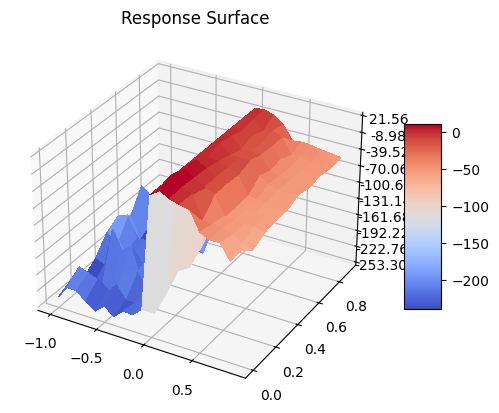

In [21]:
# 2D-arrays from DataFrame
x1 = np.linspace(df['lr'].min(), df['lr'].max(), len(df['lr'].unique()*4))
y1 = np.linspace(df['bs'].min(), df['bs'].max(), len(df['bs'].unique()*4))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['lr'], df['bs']), df['ep_r'], (x2, y2), method='cubic')

# Ready to plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(df['ep_r'].min(),df['ep_r'].max())

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Response Surface')

plt.show()

In [22]:
df[df['ep_r']==df['ep_r'].max()]

,lr,bs,ep_r
111,0.1,0.1,21.560358


In [10]:
agg_data_2 = []
for lr in np.linspace(-1.0,1.0,10):
    for bs in np.linspace(0.9,1,2):
        rewards = 0
        env.reset(0)
        for run in range(10):
            done = False
            env.reset()
            while not done:
                _, reward, done, _, _ = env.step([lr,bs])
                rewards += reward
        rewards/=10.0
        data = {'lr':lr,'bs':bs,'ep_r':rewards}
        agg_data_2.append(data)
        # print(data)

In [ ]:
df=pd.DataFrame(agg_data_2)
df.to_csv("sweep_data_3.csv")
# 2D-arrays from DataFrame
# x1 = np.linspace(df['lr'].min(), df['lr'].max(), len(df['lr'].unique()*4))
# y1 = np.linspace(df['bs'].min(), df['bs'].max(), len(df['bs'].unique()*4))

# """
# x, y via meshgrid for vectorized evaluation of
# 2 scalar/vector fields over 2-D grids, given
# one-dimensional coordinate arrays x1, x2,..., xn.
# """

# x2, y2 = np.meshgrid(x1, y1)

# # Interpolate unstructured D-dimensional data.
# z2 = griddata((df['lr'], df['bs']), df['ep_r'], (x2, y2), method='cubic')

# # Ready to plot
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(df['ep_r'].min(),df['ep_r'].max())

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Response Surface')

# plt.show()